## 01 Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. Create a DataFrame (wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result)  
`pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])`  

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [5]:
import pandas as pd
import numpy as np

data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])

data_frame = pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])

#2.1
print('2.1',data_frame['Col2'])
#2.2
print('2.2',data_frame.iloc[:,2])
#2.3
print('2.3',data_frame.iloc[2,1])



2.1 Row1    2
Row2    5
Row3    8
Name: Col2, dtype: object
2.2 Row1    3
Row2    6
Row3    9
Name: col3, dtype: object
2.3 8


## 02 Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region

In [6]:
data = pd.read_csv('./API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3642506.csv', skiprows=4)

2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)

In [7]:
data.sort_values('2014',ascending=False)[['Country Name', '2014']][:10]

,Country Name,2014
259,World,3.308519e+07
103,IDA & IBRD total,2.070376e+07
140,Low & middle income,2.017551e+07
156,Middle income,2.000640e+07
102,IBRD only,1.994180e+07
249,Upper middle income,1.509276e+07
142,Late-demographic dividend,1.436089e+07
63,East Asia & Pacific,1.415519e+07
95,High income,1.253364e+07
181,OECD members,1.209443e+07


3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes), a csv file can be found here: `/data/country_codes.csv`)
    - Find the 10 countries with highest emissions in 2014

In [8]:
codes = pd.read_csv('../../data/country_codes.csv', sep='\t', header=None)[2]
codes = codes.str.strip()
data[data['Country Code'].isin(codes)].sort_values('2014', ascending=False)[['Country Name','2014']][:10]

,Country Name,2014
40,China,9894940.0
251,United States,5102580.0
109,India,2136870.0
202,Russian Federation,1606860.0
119,Japan,1219820.0
55,Germany,737490.0
112,"Iran, Islamic Rep.",610670.0
126,"Korea, Rep.",586000.0
35,Canada,561830.0
205,Saudi Arabia,536810.0


4. Plot the emissions of China and USA over time respectively

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
    1. check the result
    2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
    1. What is the change in pct of divorced danes from 2008 to 2020?


In [22]:
import pandas as pd
hele_danmark = pd.read_csv('alle_i_danmark.csv', encoding="latin1", sep=';', header=0)
skilte_danmark = pd.read_csv('fraskilte_i_danmark.csv', encoding="latin1", sep=';', header=0)

skilte_danmark['TOTAL'] = hele_danmark['INDHOLD']
skilte_danmark['PERCENTAGE'] = skilte_danmark[['INDHOLD','TOTAL']].apply(lambda row: (row['INDHOLD']/row['TOTAL'])*100, axis=1)
skilte_danmark.head(n=10)

,KØN,ALDER,OMRÅDE,TID,CIVILSTAND,INDHOLD,TOTAL,PERCENTAGE
0,I alt,I alt,Hele landet,2008K1,Fraskilt,428864,5475791,7.832001
1,I alt,I alt,Hele landet,2008K2,Fraskilt,431550,5482266,7.871745
2,I alt,I alt,Hele landet,2008K3,Fraskilt,432713,5489022,7.883244
3,I alt,I alt,Hele landet,2008K4,Fraskilt,432156,5505995,7.848827
4,I alt,I alt,Hele landet,2009K1,Fraskilt,434233,5511451,7.878742
5,I alt,I alt,Hele landet,2009K2,Fraskilt,437466,5515287,7.931881
6,I alt,I alt,Hele landet,2009K3,Fraskilt,439378,5519441,7.960553
7,I alt,I alt,Hele landet,2009K4,Fraskilt,439428,5532531,7.942622
8,I alt,I alt,Hele landet,2010K1,Fraskilt,441913,5534738,7.984353
9,I alt,I alt,Hele landet,2010K2,Fraskilt,444765,5540241,8.027900


2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [18]:
byer_danmark = pd.read_csv('alle_byer_i_danmark.csv', encoding="latin1", sep=';',header=0)
# skal være ugifte ikke fraskilte
fraskilt_pr_by = pd.read_csv('fraskilt_pr_by.csv', encoding='latin1', sep=';', header=0)

fraskilt_pr_by['TOTAL'] = byer_danmark['INDHOLD']
fraskilt_pr_by['PERCENTAGE'] = fraskilt_pr_by[['INDHOLD','TOTAL']].apply(lambda row: (row['INDHOLD']/row['TOTAL'])*100, axis=1)
# ~ tegn betyder 'not'
fraskilt_pr_by[~fraskilt_pr_by['OMRÅDE'].str.contains('Region|Hele')].sort_values('TOTAL', ascending=False,).iloc[:5,:].sort_values('PERCENTAGE', ascending=False)


,OMRÅDE,ALDER,CIVILSTAND,TID,INDHOLD,TOTAL,PERCENTAGE
71,Vejle,I alt,Fraskilt,2020K4,10753,116665,9.216989
58,Odense,I alt,Fraskilt,2020K4,18139,205881,8.810429
2,København,I alt,Fraskilt,2020K4,55063,637936,8.631430
104,Aalborg,I alt,Fraskilt,2020K4,17971,219310,8.194337
84,Aarhus,I alt,Fraskilt,2020K4,27122,353445,7.673613


3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

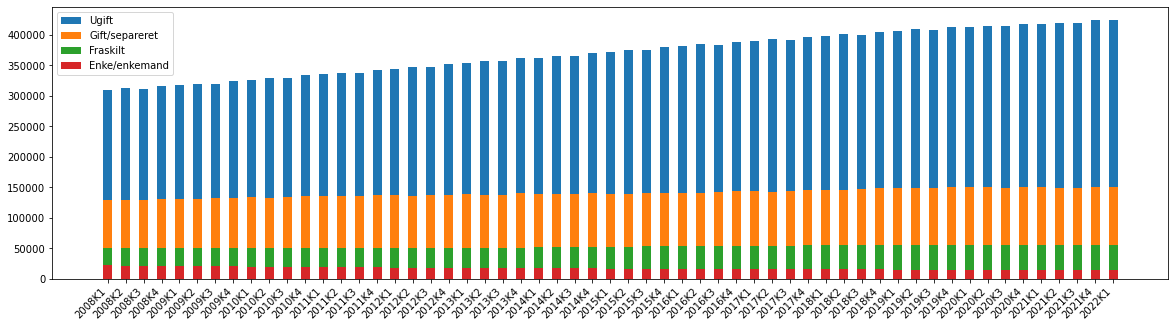

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

marital = pd.read_csv('marital_status_cph.csv', encoding='latin1', sep=';', header=0)
# categories = set(marital['CIVILSTAND'])
categories = ['Ugift','Gift/separeret','Fraskilt','Enke/enkemand']

for i in categories:
  plt.bar(marital[marital['CIVILSTAND'] == i]['TID'], marital[marital['CIVILSTAND'] == i]['INDHOLD'], width=0.5, align='center')

plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.legend(categories)
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from  0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

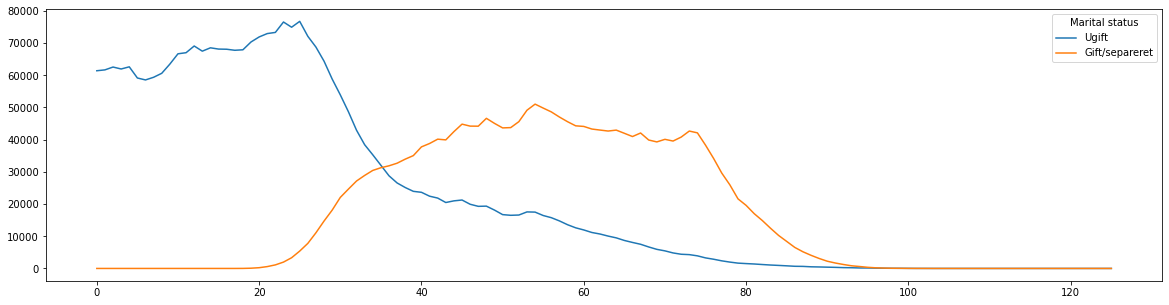

In [12]:
plt.rcParams["figure.figsize"] = (20,5)

gift_ugift = pd.read_csv('gift_ugift_danmark.csv', encoding='latin1', sep=';', header=0)

ugift = gift_ugift[(gift_ugift['ALDER'].str.contains('år')) & (gift_ugift['CIVILSTAND'] == 'Ugift')]
gift = gift_ugift[(gift_ugift['ALDER'].str.contains('år')) & (gift_ugift['CIVILSTAND'] == 'Gift/separeret')]

plt.plot(ugift['ALDER'].str.slice(0,-2).apply(pd.to_numeric),ugift['INDHOLD'],label='Ugift')
plt.plot(gift['ALDER'].str.slice(0,-2).apply(pd.to_numeric),gift['INDHOLD'], label='Gift/separeret')
plt.legend(title='Marital status')
plt.show()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots